## Flatiron Capstone

- Peter Burton
- Live Cohort
- Submission Date: 8/25/22
- Instructors: William Wang & Daniel Burdeno

##  Overview

I am a data science student creating a model that can help provide predictions and advice to Fantasy Football players. The model will use data from the last 4+ NFL seasons and use machine learning to create predictions for upcoming seasons that can help Fantasy Football Players make decisions regarding drafting, trading, or managing their team.

## Business Problem

Fantasy sports in North America are estimated to be a 26 Billion dollar industry(https://www.nbcnews.com/business/business-news/fantasy-sports-industry-numbers-n439536). Eclipsing even the yearly profits of the NFL. The largest and most lucrative fantasy sport is Fantasy Football, whose leagues are based on the NFL season each year. Ff You generousally include all of the time spent on fantasy football, you arrive at the outlandish figure of 70 Billion per year just in fantasy football(https://www.forbes.com/sites/briangoff/2013/08/20/the-70-billion-fantasy-football-market/?sh=71c11ec5755c).  

Fantasy Football sometimes has players buy entry into leagues that then reward top teams with cash prizes, or they can be a bragging-rights only leagues between friends or fans. 

Either way, the competitive nature of the hobby inspires a slew of blogs, podcasts, analysis, and banter between players. 

Our model will give players in these leagues another tool to assess their fantasy football decision, and hopefully give them a competitive edge. Although players have a large amount of data at their fingertips, much of it is opinion based and based on the reaction or overreaction to recent news and can be subject to the bias of a human analyst. 

A machine learning model that can sift through hundreds of players and thousands of games and find patters or identify key metrics, and recommend players based on that data can create a reliable and unbiased tool for fantasy participants. Although consistently and correctly predicting the Fantasy Football world is a lot like trying to outpredict the stock market, using statistical methods to predict fantasy ouput has show to be effective(https://www.ijcaonline.org/archives/volume164/number4/27471-2017913614).


## Data Sourcing

All data for this project is sourced from https://www.pro-football-reference.com/. Particularly, the data is from the 2017, 2018, 2019, 2020, and 2021 Seasons. The data is uploaded in 5 seperate CSV folders, one for each season, to this project's github repository.

The Data we look at will include the relevant fantasy statistics for every active player in the NFL for scored fantasy points for each of those season. The Columns for our data set are:

- Rk (Overall Player Rank)
- Player (Player name) 
- Tm (Team played for)
- FantPos (Position for purpose of fantasy, such as "QB" for quarterback)
- Age (Player Age))
- G (Games Played or eligible in)
- GS (Games scored points in)
- Cmp (Pass Completions)
- Att (Pass Attempts)
- Yds (Pass Yards)
- TD (Passing Touchdowns)
- Int (Passing interceptions)
- Att.1 (Rushing Attempts)
- Yds.1 (Rushing Yards)
- Y/A (Yards after Contact)
- TD.1 (Rushing Touchdowns)
- Tgt (Receiving Targets, or how often the QB attempted to throw to this player)
- Rec (Receptions)
- Yds.2 (Receiving Yards)
- Y/R (Yards per Receptions)
- TD.2 (Receiving Touchdowns)
- Fmb (Fumbles)
- FL (Fumbles Lost)
- TD.3 (Total Touchdowns)
- 2PM (2-point conversion scored)
- 2PP(2-Point conversion pass thrown)
- FantPt (Total Fantasy points through standard scoring system)
- PPR (Total Fantasy points through Point Per Reception scoring system)
- DKPt (Total Fantasy points through DraftKings scoring system)
- FDPt (Total Fantasy points through Fan Duel scoring system)
- VBD (Value vs replacement metric)
- PosRank (Rank within fantasy position)
- OvRank (overall rank)
- -9999 (Unique player ID)






## Imports

In [217]:
import numpy as np
import os, tempfile
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Lets start by reading in the data we have for each season in seperate CSV files into Panda Dataframes and inspecting a a few years for consistency and to see our collumns

In [218]:
pd17 = pd.read_csv("./data/2017nfldata.csv")
pd18 = pd.read_csv("./data/2018nfldata.csv")
pd19 = pd.read_csv("./data/2019nfldata.csv")
pd20 = pd.read_csv("./data/2020nfldata.csv")
pd21 = pd.read_csv("./data/2021nfldata.csv")

In [219]:
pd19.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Christian McCaffrey*+,CAR,RB,23,16,16,0,2,0,...,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0,McCaCh01
1,2,Lamar Jackson*+,BAL,QB,22,15,15,265,401,3127,...,NaN,NaN,416.0,415.7,429.7,421.7,152.0,1,2.0,JackLa00
2,3,Derrick Henry *,TEN,RB,25,15,15,0,0,0,...,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0,HenrDe00


In [220]:
pd20.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Derrick Henry *+,TEN,RB,26,16,16,0,0,0,...,1.0,NaN,314.0,333.1,341.1,323.6,184.0,1,1.0,HenrDe00
1,2,Alvin Kamara*,NOR,RB,25,15,10,0,0,0,...,NaN,NaN,295.0,377.8,383.8,336.3,165.0,2,2.0,KamaAl00
2,3,Dalvin Cook*,MIN,RB,25,14,14,0,0,0,...,3.0,NaN,294.0,337.8,346.8,315.8,164.0,3,3.0,CookDa01


In [221]:
pd21.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0.0,0.0,0.0,...,NaN,NaN,333.0,373.1,381.1,353.1,187.0,1,1.0,TaylJo02
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0.0,1.0,0.0,...,1.0,NaN,295.0,439.5,442.5,367.0,173.0,1,2.0,KuppCo00
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1.0,2.0,24.0,...,NaN,NaN,262.0,339.0,347.0,300.5,140.0,2,3.0,SamuDe00


In [222]:
for col in pd17.columns:
    print(col)

Rk
Player
Tm
FantPos
Age
G
GS
Cmp
Att
Yds
TD
Int
Att.1
Yds.1
Y/A
TD.1
Tgt
Rec
Yds.2
Y/R
TD.2
Fmb
FL
TD.3
2PM
2PP
FantPt
PPR
DKPt
FDPt
VBD
PosRank
OvRank
-9999


In [223]:
for col in pd18.columns:
    print(col)

Rk
Player
Tm
FantPos
Age
G
GS
Cmp
Att
Yds
TD
Int
Att.1
Yds.1
Y/A
TD.1
Tgt
Rec
Yds.2
Y/R
TD.2
Fmb
FL
TD.3
2PM
2PP
FantPt
PPR
DKPt
FDPt
VBD
PosRank
OvRank
-9999


Now that we have all our data and it appears to be consistent across years, l will go ahead and drop some of the columns we don’t need. It is pointless to have multiple different scoring systems within our data, since they are all tabulating the same information just in different ways. PPR system gives receivers an additional 1 point per reception vs standard for example. Some of the scoring system assign 6 points for passing TDS, some assign 4 to decrease the value of QBs to that of other positions. 

I have elected to use the PPR system as the scoring system of choice for two reasons. First, had has become one of the most standard scoring systems since it helps WRs have values closer to that of RBS in leagues. Second, my siblings created a PPR based fantasy football league and my performance last year was subpar to put it mildly.  

Let’s go ahead and drop all the scoring systems and player rank columns now


In [224]:
pd17 = pd17.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd18 = pd18.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd19 = pd19.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd20 = pd20.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd21 = pd21.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])

We also will go ahead and fill missing collumns  with 0, since it seems to be filled as NaN in some weeks or seasons a player didnt play or scored 0. 

In [225]:
pd17.fillna(0, inplace=True)
pd18.fillna(0, inplace=True)
pd19.fillna(0, inplace=True)
pd20.fillna(0, inplace=True)
pd21.fillna(0, inplace=True)


In [226]:
pd21_ref=pd21
pd21_ref.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999
0,IND,RB,22,17,17,0.0,0.0,0.0,0.0,0.0,...,360.0,9.00,2.0,4.0,2.0,20,0.0,0.0,373.1,TaylJo02
1,LAR,WR,28,17,17,0.0,1.0,0.0,0.0,0.0,...,1947.0,13.43,16.0,0.0,0.0,16,1.0,0.0,439.5,KuppCo00
2,SFO,WR,25,16,15,1.0,2.0,24.0,1.0,0.0,...,1405.0,18.25,6.0,4.0,2.0,14,0.0,0.0,339.0,SamuDe00
3,BUF,QB,25,17,17,409.0,646.0,4407.0,36.0,15.0,...,0.0,0.00,0.0,8.0,3.0,6,2.0,1.0,402.6,AlleJo02
4,LAC,RB,26,16,16,0.0,0.0,0.0,0.0,0.0,...,647.0,9.24,8.0,4.0,3.0,20,2.0,0.0,343.8,EkelAu00


Our dataframes look much more manageable, our next step is to assign a target for our model. In this case the PPR score for the following season will be our target, since we want to train our model how to predict for future seasons.

In [227]:
pd17target = pd18[['PPR','-9999']]

In [228]:
pd17target.head()

,PPR,-9999
0,372.1,GurlTo01
1,385.8,BarkSa00
2,385.5,McCaCh01
3,354.2,KamaAl00
4,417.1,MahoPa00


In [229]:
pd18target = pd19[['PPR','-9999']]
pd19target = pd20[['PPR','-9999']]
pd20target = pd21[['PPR','-9999']]


In [230]:
pd17target.rename(columns={'PPR':'PPRtarget'}, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [231]:
pd17target.head()

,PPRtarget,-9999
0,372.1,GurlTo01
1,385.8,BarkSa00
2,385.5,McCaCh01
3,354.2,KamaAl00
4,417.1,MahoPa00


In [232]:
pd18target.rename(columns={'PPR':'PPRtarget'}, inplace=True)
pd19target.rename(columns={'PPR':'PPRtarget'}, inplace=True)
pd20target.rename(columns={'PPR':'PPRtarget'}, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [233]:
pd18target.head()

,PPRtarget,-9999
0,471.2,McCaCh01
1,415.7,JackLa00
2,294.6,HenrDe00
3,314.8,JoneAa00
4,311.7,ElliEz00


In [234]:
pd17final = pd17.merge(pd17target,how='left', left_on='-9999', right_on='-9999')

In [235]:
pd17final.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,LAR,RB,23,15,15,0,0,0,0,0,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
1,PIT,RB,25,15,15,0,0,0,0,0,...,7.71,2,3.0,2,11,0.0,0.0,341.6,BellLe00,NaN
2,KAN,RB,22,16,16,0,0,0,0,0,...,8.58,3,1.0,1,11,0.0,0.0,295.2,HuntKa00,230.2
3,NOR,RB,22,16,3,0,0,0,0,0,...,10.20,5,1.0,1,14,1.0,0.0,320.4,KamaAl00,354.2
4,LAC,RB,24,16,16,0,0,0,0,0,...,8.21,4,1.0,0,12,0.0,0.0,288.1,GordMe00,275.5


In [236]:
pd18final = pd18.merge(pd18target,how='left', left_on='-9999', right_on='-9999')
pd19final = pd19.merge(pd19target,how='left', left_on='-9999', right_on='-9999')
pd20final = pd20.merge(pd20target,how='left', left_on='-9999', right_on='-9999')

In [237]:
df_final = pd.DataFrame().append([pd18final,pd19final, pd20final, pd17final])

In [238]:
df_final = df_final.sort_values('PPR', ascending=False)
df_final.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,CAR,RB,23,16,16,0,2,0,0,0,...,8.66,4,1.0,0,19,1.0,0.0,471.2,McCaCh01,90.4
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0
1,BAL,QB,22,15,15,265,401,3127,36,6,...,0.00,0,9.0,2,7,0.0,0.0,415.7,JackLa00,332.8
6,BUF,QB,24,16,16,396,572,4544,37,10,...,12.00,1,9.0,6,9,0.0,0.0,396.1,AlleJo02,402.6
1,NYG,RB,21,16,16,0,0,0,0,0,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1


In [239]:
df_final.shape

(2492, 27)

We have added the PPR from the following season to each seasons data as a target, and then combined 2017-2020 for 4 years of data. When we sort by PPR, we can see some of the largest fantasy stars over the last 5 years, led by McCaffrey with a wopping score of 471 in one season. 

Lets go ahead and get rid of some of the data that we done want and clean up the dataframe a bit. I will drop rows from years that a player didnt score any points at all, or if they didnt participate in the following year and we do not have a target for our model. We will also clean up any null values, and drop our unqiue player tag string for now before we scale our data.

In [240]:
df_final = df_final[df_final['PPR'] > 0]  
df_final = df_final.dropna(subset = ['PPR'])
df_final = df_final.dropna(subset = ['PPRtarget'])
df_final.fillna(0, inplace=True)
df_final = df_final.drop(columns=['-9999'])

In [241]:
df_final.isna().sum()

Tm           0
FantPos      0
Age          0
G            0
GS           0
Cmp          0
Att          0
Yds          0
TD           0
Int          0
Att.1        0
Yds.1        0
Y/A          0
TD.1         0
Tgt          0
Rec          0
Yds.2        0
Y/R          0
TD.2         0
Fmb          0
FL           0
TD.3         0
2PM          0
2PP          0
PPR          0
PPRtarget    0
dtype: int64

In [242]:
df_final.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
0,CAR,RB,23,16,16,0,2,0,0,0,...,1005,8.66,4,1.0,0,19,1.0,0.0,471.2,90.4
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0,0.00,0,9.0,2,2,1.0,0.0,417.1,287.0
1,BAL,QB,22,15,15,265,401,3127,36,6,...,0,0.00,0,9.0,2,7,0.0,0.0,415.7,332.8
6,BUF,QB,24,16,16,396,572,4544,37,10,...,12,12.00,1,9.0,6,9,0.0,0.0,396.1,402.6
1,NYG,RB,21,16,16,0,0,0,0,0,...,721,7.92,4,0.0,0,15,1.0,0.0,385.8,244.1


In [243]:
df_final.shape

(1711, 26)

Now that we have cleaned up our data we are down to 1711 unique different individual's NFL seasons to model with. I will split my data into a training set and a test set, holding out 20 percent to evaluate our model at the end. 

## Train Test Split

In [244]:
X = df_final.drop(columns=['PPRtarget'])
y = df_final['PPRtarget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [245]:
X_train.shape

(1368, 25)

In [246]:
y_train.shape

(1368,)

## Correlation 

Now that we have done our train/test split, lets look at our data and get an idea of how the variables are related. 

In [248]:
trainset = X_train.join(y_train)

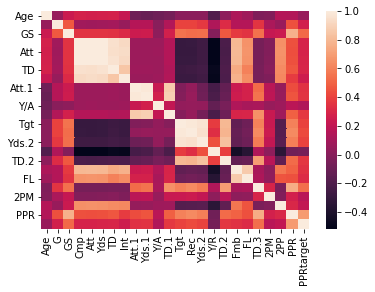

In [249]:
sns.heatmap(trainset.corr());

In [250]:
trainset.corr()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
Age,1.000000,0.053818,0.241650,0.278406,0.269656,0.274608,0.281941,0.220759,-0.087588,-0.109490,...,0.014343,-0.191037,0.023483,0.133631,0.082459,-0.029715,-0.013822,0.158447,0.149378,0.060881
G,0.053818,1.000000,0.471884,0.090024,0.085837,0.092009,0.102098,0.058404,0.160575,0.160373,...,0.372326,0.137030,0.324765,0.158417,0.158137,0.359954,0.128183,0.059878,0.445853,0.270416
GS,0.241650,0.471884,1.000000,0.352411,0.350946,0.352814,0.344720,0.318402,0.243923,0.250206,...,0.539713,-0.009146,0.471180,0.372452,0.349692,0.548649,0.219760,0.236685,0.774728,0.525470
Cmp,0.278406,0.090024,0.352411,1.000000,0.998128,0.997070,0.955416,0.927934,0.073258,0.072953,...,-0.264621,-0.511522,-0.218400,0.794546,0.659707,-0.054536,-0.016648,0.653829,0.443600,0.285661
Att,0.269656,0.085837,0.350946,0.998128,1.000000,0.995258,0.948292,0.938137,0.073878,0.074645,...,-0.266903,-0.515674,-0.220320,0.802622,0.664885,-0.055778,-0.016174,0.660973,0.438766,0.283671
Yds,0.274608,0.092009,0.352814,0.997070,0.995258,1.000000,0.963794,0.925447,0.073927,0.074225,...,-0.262952,-0.509967,-0.217156,0.794813,0.656872,-0.054214,-0.010870,0.651775,0.449049,0.289968
TD,0.281941,0.102098,0.344720,0.955416,0.948292,0.963794,1.000000,0.850096,0.078613,0.082244,...,-0.244297,-0.485975,-0.202828,0.749186,0.600345,-0.051652,0.000033,0.635102,0.466284,0.296614
Int,0.220759,0.058404,0.318402,0.927934,0.938137,0.925447,0.850096,1.000000,0.066435,0.068560,...,-0.257457,-0.492309,-0.212544,0.772745,0.640008,-0.053399,-0.028711,0.622884,0.383267,0.253140
Att.1,-0.087588,0.160575,0.243923,0.073258,0.073878,0.073927,0.078613,0.066435,1.000000,0.983804,...,-0.094727,-0.233488,-0.126634,0.241027,0.279640,0.529408,0.177298,0.050065,0.437315,0.343677
Yds.1,-0.109490,0.160373,0.250206,0.072953,0.074645,0.074225,0.082244,0.068560,0.983804,1.000000,...,-0.078297,-0.219323,-0.112134,0.249770,0.281078,0.552466,0.190341,0.054551,0.457541,0.353788


In [141]:
cr = trainset.corr()
cr = cr[cr < 1]

In [142]:
cr.unstack().sort_values(ascending=False)[:30]

Cmp    Att      0.998128
Att    Cmp      0.998128
Cmp    Yds      0.997070
Yds    Cmp      0.997070
       Att      0.995258
Att    Yds      0.995258
Yds.1  Att.1    0.983804
Att.1  Yds.1    0.983804
Rec    Tgt      0.982722
Tgt    Rec      0.982722
       Yds.2    0.966029
Yds.2  Tgt      0.966029
Yds    TD       0.963794
TD     Yds      0.963794
Cmp    TD       0.955416
TD     Cmp      0.955416
Rec    Yds.2    0.952893
Yds.2  Rec      0.952893
TD     Att      0.948292
Att    TD       0.948292
Int    Att      0.938137
Att    Int      0.938137
Cmp    Int      0.927934
Int    Cmp      0.927934
Yds    Int      0.925447
Int    Yds      0.925447
TD.1   Yds.1    0.884074
Yds.1  TD.1     0.884074
TD.1   Att.1    0.867993
Att.1  TD.1     0.867993
dtype: float64

We have some collinearity with our dataframe, many of our metrics are tied together. The underlying principle seeming to be that volume of any sort correlates the other metrics.For example, a QB who throws passes will almost always get completions and TDS at a reasonably similar rate as well.This makes sense, since there would be no reason for an NFL team to start or even roster players that didnt perfom well with the volume they are given, but it is something to keep in mind. 

## Feature engineering

We want to be able to include team data in our model, since team culture, player talent surrounding a player, or offensive playcalling can differ greatly between teams and can be a factor for player production. In order to analyze our categorical vaiables, we will convert the team each player was on, and the position that they play with one hot encoding

In [251]:
categoricals = ['Tm', 'FantPos']
X_train_dummies = pd.get_dummies(X_train[categoricals], prefix=categoricals)
X_train_dummies

,Tm_2TM,Tm_3TM,Tm_ARI,Tm_ATL,Tm_BAL,Tm_BUF,Tm_CAR,Tm_CHI,Tm_CIN,Tm_CLE,...,Tm_PIT,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
110,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
192,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
467,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [252]:
categoricals = ['Tm', 'FantPos']
X_test_dummies = pd.get_dummies(X_test[categoricals], prefix=categoricals)
X_test_dummies

,Tm_2TM,Tm_ARI,Tm_ATL,Tm_BAL,Tm_BUF,Tm_CAR,Tm_CHI,Tm_CIN,Tm_CLE,Tm_DAL,...,Tm_PIT,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
311,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Dropping original categorical values so that we can add dummy columns:

In [146]:
X_train.drop(['Tm', 'FantPos'], axis=1, inplace=True)
X_test.drop(['Tm', 'FantPos'], axis=1, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Removing data for data on players that played on multiple teams in one season:

In [147]:
X_train_dummies.drop(['Tm_2TM', 'Tm_3TM'], axis=1, inplace=True)
X_test_dummies.drop(['Tm_2TM'], axis=1, inplace=True)

In [148]:
X_train.shape

(1368, 23)

In [149]:
X_train_dummies.shape

(1368, 37)

Joining our catergorical data to our test/train sets:

In [150]:
X_train = pd.concat([X_train, X_train_dummies], axis="columns")

In [151]:
X_test = pd.concat([X_test, X_test_dummies], axis="columns")

In [152]:
X_train.shape


(1368, 60)

In [153]:
X_train.head(5)

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Tm_PIT,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
110,30,15,10,0,0,0,0,0,198,680,...,0,0,0,0,0,0,0,1,0,0
246,29,16,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
294,23,12,0,0,0,0,0,0,36,191,...,0,0,0,0,0,0,0,1,0,0
99,24,16,16,0,0,0,0,0,234,871,...,0,0,0,1,0,0,0,1,0,0
255,27,16,14,0,0,0,0,0,8,30,...,0,0,1,0,0,0,0,1,0,0


Now that we have one hot encoded team and position, lets take a look at doing something similar with age. Since a value of 33 vs a value of 27 is not that different as an absolute value for are model, but it is very significant in determining an NFL players age, ie mid career vs close to retirement for most players, I am going to divide up the ages of players into discreete bins. For the purpse of fantasy analysis, I am grouping players by 3 groups. Young players(<25), who are rookies or in their first 2 years of data in the league in most cases and establishing their value still. Mid-career players(25-29) who have established their performance and typically are not showing droppoff yet, and late career players(30+) where each additional year in the league significantly increases the chance they will retire and is likely to decrease production. 

In [253]:
X_test["Age Bins"] = pd.cut(X_test['Age'], 
    [0, 24, 29, 100], 
    labels=['A', 'B', 'C'],
    right=True               
)
X_train["Age Bins"] = pd.cut(X_train['Age'], 
    [0, 24, 29, 100], 
    labels=['A', 'B', 'C'],
    right=True               
)

<ipython-input-253-740cc0623cb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Age Bins"] = pd.cut(X_test['Age'],
<ipython-input-253-740cc0623cb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age Bins"] = pd.cut(X_train['Age'],


In [254]:
X_test.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,Age Bins
311,SFO,WR,24,11,4,1,1,16,0,0,...,109,9.91,2,0.0,0,2,0.0,0.0,34.5,A
368,BAL,RB,23,16,0,0,0,0,0,0,...,12,3.00,2,0.0,0,2,0.0,0.0,17.2,A
439,LAC,RB,25,16,4,0,0,0,0,0,...,35,17.50,0,0.0,0,0,0.0,0.0,7.9,B
24,NOR,WR,24,16,14,0,0,0,0,0,...,1245,11.97,5,0.0,0,5,0.0,0.0,258.5,A
364,LAC,TE,31,15,4,0,0,0,0,0,...,78,8.67,1,0.0,0,1,0.0,0.0,22.8,C


Now that we can see that we have a dataframe that mirrors X_test but with A,B,C representing ages, lets remove the original "Age" column, and then one hot encode the age categoricals. 

In [255]:
X_test_age_dummies = pd.get_dummies(X_test["Age Bins"], prefix='age')
X_train_age_dummies = pd.get_dummies(X_train["Age Bins"], prefix='age')
X_test_age_dummies

,age_A,age_B,age_C
311,1,0,0
368,1,0,0
439,0,1,0
24,1,0,0
364,0,0,1
...,...,...,...
502,0,1,0
285,0,0,1
40,1,0,0
107,1,0,0


Lets add that to our dataframe. Also can remove one of the age catergories since if a player's A or B catergory encoding is known, by default we know if they are in C or not 

In [157]:
X_test = pd.concat([X_test, X_test_age_dummies], axis="columns")
X_test.drop(['age_A'], axis=1, inplace=True)
X_test.drop(['Age Bins'], axis=1, inplace=True)
X_test.drop(['Age'], axis=1, inplace=True)

X_train = pd.concat([X_train, X_train_age_dummies], axis="columns")
X_train.drop(['age_A'], axis=1, inplace=True)
X_train.drop(['Age Bins'], axis=1, inplace=True)
X_train.drop(['Age'], axis=1, inplace=True)

In [158]:
X_test.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C
311,11,4,1,1,16,0,0,0,0,0.0,...,1,0,0,0,0,0,0,1,0,0
368,16,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
439,16,4,0,0,0,0,0,6,24,4.0,...,0,0,0,0,0,1,0,0,1,0
24,16,14,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
364,15,4,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [159]:
X_train.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C
110,15,10,0,0,0,0,0,198,680,3.43,...,0,0,0,0,0,1,0,0,0,1
246,16,11,0,0,0,0,0,0,0,0.00,...,0,0,0,0,0,0,1,0,1,0
294,12,0,0,0,0,0,0,36,191,5.31,...,0,0,0,0,0,1,0,0,0,0
99,16,16,0,0,0,0,0,234,871,3.72,...,0,1,0,0,0,1,0,0,0,0
255,16,14,0,0,0,0,0,8,30,3.75,...,1,0,0,0,0,1,0,0,1,0


## Normalizing Data

In [160]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train.value_counts(normalize=True)

0.0      0.062865
2.2      0.004386
1.8      0.004386
9.2      0.003655
3.1      0.003655
           ...   
10.6     0.000731
143.3    0.000731
72.7     0.000731
380.8    0.000731
116.5    0.000731
Name: PPRtarget, Length: 923, dtype: float64

## Dummy Model

In [161]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_scaled, y_train)

DummyRegressor()

In [162]:
print(dummy.predict(y)[:10])

[89.23559942 89.23559942 89.23559942 89.23559942 89.23559942 89.23559942
 89.23559942 89.23559942 89.23559942 89.23559942]


Our Dummy model simple predicts the average fantasy point score of 89.2 for each player

## Linear Regression Simple Model

In [163]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [164]:
lr.score(X_train_scaled,y_train)

0.5631374707620538

In [165]:
lr_cv_results = cross_validate(lr, X_train_scaled, y_train, cv=5)

In [166]:
lr_cv_results

{'fit_time': array([0.00398946, 0.00150752, 0.00199604, 0.00099182, 0.00199437]),
 'score_time': array([0.        , 0.0009923 , 0.        , 0.00099778, 0.00099778]),
 'test_score': array([0.42540114, 0.58586247, 0.49845161, 0.44972751, 0.52788673])}

In [167]:
lr_test_scores = lr_cv_results['test_score']
lr_score = lr_test_scores.mean()
lr_score

0.49746588963594257

## Decision Tree Regressor

In [191]:
dt = DecisionTreeRegressor() 

dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [112]:
dt.score(X_train_scaled,y_train)

1.0

In [137]:
dt_cv_results = cross_validate(dt, X_train_scaled, y_train, cv=5)

In [138]:
dt_cv_results

{'fit_time': array([0.01296663, 0.01296496, 0.01296544, 0.0129652 , 0.01196837]),
 'score_time': array([0.00099659, 0.00099778, 0.00099683, 0.        , 0.00099802]),
 'test_score': array([-0.16430972,  0.14662501,  0.18028091,  0.12486771,  0.11644921])}

In [139]:
dt_test_scores = dt_cv_results['test_score']
dt_score = dt_test_scores.mean()
dt_score

0.08078262499912581

## KNN Regressor

In [192]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train)



KNeighborsRegressor(n_neighbors=12)

In [185]:
knn.score(X_train_scaled,y_train)


0.49555226897634885

In [118]:
knn_cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5)
knn_cv_results

{'fit_time': array([0.00997448, 0.00997353, 0.00897598, 0.00897598, 0.00797796]),
 'score_time': array([0.02592969, 0.02393603, 0.02293849, 0.02293968, 0.02293897]),
 'test_score': array([0.30913337, 0.46233068, 0.41169172, 0.33612563, 0.34495354])}

In [119]:
knn_test_scores = knn_cv_results['test_score']
knn_score = knn_test_scores.mean()
knn_score

0.3728469888053502

## Random Forest Regressor

In [193]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
 

RandomForestRegressor()

In [141]:
rf.score(X_train_scaled,y_train)

0.9302197608807329

In [150]:
rf_cv_results = cross_validate(rf, X_train_scaled, y_train, cv=20)
rf_cv_results

{'fit_time': array([0.89845228, 0.90422273, 0.91034389, 0.90458059, 0.89785385,
        0.88899207, 0.88326693, 0.90196347, 0.89376235, 0.88916945,
        0.89537358, 0.89244199, 0.88555479, 0.89011717, 0.89360857,
        0.9662919 , 0.92616701, 0.90261126, 0.8899982 , 0.88849354]),
 'score_time': array([0.00698137, 0.00598788, 0.00596166, 0.00698113, 0.00598311,
        0.00622368, 0.00698137, 0.00598478, 0.00615001, 0.00698233,
        0.00651288, 0.00698042, 0.00698113, 0.00698137, 0.00698185,
        0.00797892, 0.00696754, 0.00695658, 0.00599504, 0.00599194]),
 'test_score': array([0.20890779, 0.61967472, 0.33831078, 0.30717306, 0.47794902,
        0.48600731, 0.63784991, 0.64847312, 0.54281614, 0.37104018,
        0.47666742, 0.53378944, 0.57311498, 0.36138243, 0.26350195,
        0.6220372 , 0.47968742, 0.25085569, 0.67598923, 0.5465324 ])}

In [149]:
rf_test_scores = rf_cv_results['test_score']
rf_score = rf_test_scores.mean()
rf_score

0.48392947558458876

## Gradient Boost

In [194]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [125]:
gbr.score(X_train_scaled,y_train)

0.7176379817666825

In [126]:
gbr_cv_results = cross_validate(gbr, X_train_scaled, y_train, cv=3)
gbr_cv_results

{'fit_time': array([0.19207001, 0.18762922, 0.18793082]),
 'score_time': array([0.00099111, 0.00099754, 0.00099707]),
 'test_score': array([0.44371211, 0.55374651, 0.52157388])}

In [127]:
gbr_test_scores = gbr_cv_results['test_score']
gbr_score = gbr_test_scores.mean()
gbr_score

0.5063441679950428

## Choosing Best Untuned Model

In [128]:
pd.DataFrame({'Linear Regression':[lr_score],
              'KNN Regression': [knn_score],
              'Random Forest Regressor': [rf_score],
               'Gradient Boost Regressor': [gbr_score]
             })

,Linear Regression,KNN Regression,Random Forest Regressor,Gradient Boost Regressor
0,0.497466,0.372847,0.491486,0.506344


It appears that the linear Regression model is the most accurate with untuned parameters, followed by RF and Gradient Boost. Lets move to a tuned model approach and use grid search on these models.  

## Applying GridSearch

## Lasso(L1) Regression

In order to apply a grid search to a linear regression model, I am going to use L1 regulization, or Lasso. Lasso is an effective technique with our data since it is a method that helps reduce the dimensionality of our data. Since we have a lot of statisical data that is correlated, Lasso regression will allow us to deal with multicollinearity. 

In [129]:
lasso_parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

In [130]:
grid_lr = GridSearchCV(estimator=Lasso(), param_grid = lasso_parameters, cv = 10, n_jobs=-1)

In [ ]:
grid_lr.fit(X_train_scaled, y_train)

Our first Grid search did not converge with Lasso, so lets change the tolerance and add more parameters

In [ ]:
lasso_parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],
                    'normalize': [True, False],
                     'fit_intercept':[True, False],
                     'selection':["cyclic","random"],
                    'tol':[0.0001, 0.001,0.01,0.1,0.5]
                   }

In [ ]:
grid_lr = GridSearchCV(estimator=Lasso(tol=1e-2), param_grid = lasso_parameters, cv = 10, n_jobs=-1)

In [ ]:
grid_lr.fit(X_train_scaled, y_train)

In [ ]:
print("\n Best parameters:\n",grid_lr.best_params_)
print("\n With a score of:\n",grid_lr.best_score_)

We seem to have dealt with the convergence issue, now lets adjust the alpha parameters since the best paramter is at the upper range, and give it more tolerance options near .01

In [ ]:
lasso_parameters = {'alpha':[5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ],
                    'normalize': [True, False],
                     'fit_intercept':[True, False],
                     'selection':["cyclic","random"],
                    'tol':[0.07,0.01,0.012,0.015]
                   }

In [ ]:
grid_lr = GridSearchCV(estimator=Lasso(), param_grid = lasso_parameters, cv = 10, n_jobs=-1)

In [ ]:
grid_lr.fit(X_train_scaled, y_train)

In [ ]:
print("\n Best parameters:\n",grid_lr.best_params_)
print("\n With a score of:\n",grid_lr.best_score_)

lets repeat the process with a range of alpha close to the best parameter of 1, and tolerance tuned again

In [ ]:
lasso_parameters = {'alpha':[.7,.9,.95, 1,1.25,1.5,2,3],
                    'normalize': [True, False],
                     'fit_intercept':[True, False],
                     'selection':["cyclic","random"],
                    'tol':[0.01,0.011,0.012,0.015]
                   }

grid_lr = GridSearchCV(estimator=Lasso(), param_grid = lasso_parameters, cv = 10, n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_lr.best_params_)
print("\n With a score of:\n",grid_lr.best_score_)

Repeating one final time with a range of alpha around 1.5, leaning closer to 1

In [180]:
lasso_parameters = {'alpha':[1.25,1.3,1.33,1.35,1.38,1.4,1.42,1.45,1.48,1.5,1.55,1.6,1.65,1.7,1.75,1.8],
                    'normalize': [True, False],
                     'fit_intercept':[True, False],
                     'selection':["cyclic","random"],
                    'tol':[0.09,0.095,0.01,0.011,0.012,0.013,0.014]
                   }

grid_lr = GridSearchCV(estimator=Lasso(), param_grid = lasso_parameters, cv = 10, n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_lr.best_params_)
print("\n With a score of:\n",grid_lr.best_score_)


 Best parameters:
 {'alpha': 1.6, 'fit_intercept': True, 'normalize': False, 'selection': 'random', 'tol': 0.01}

 With a score of:
 0.5169847139172541


The final accuracy of our Lasso model is 0.5168

# Random Forest Grid Search

Setting up our parameters for Random Forest, we initially give it a fairly wide spectrum of options

In [131]:
rf_parameters = { "n_estimators" : [50,100,200],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [2,3,7],
                          "bootstrap": [True, False],
                     "max_depth": [3,10,50],
                 'min_samples_leaf': [1, 3, 6],
            }



In [132]:
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 5, n_jobs=-1)

In [133]:
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 10, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 3, 7],
                         'n_estimators': [50, 100, 200]})

In [134]:
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 100}

 With a score of:
 0.5042371492628068


Based on our initial grid search, we adjust parameters and change the cross validation back to 10

In [135]:
rf_parameters = { "n_estimators" : [75,100,150,200],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [5,7,9],
                          "bootstrap": [True, False],
                     "max_depth": [2,3,5],
                 'min_samples_leaf': [5, 6, 8],
            }
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 150}

 With a score of:
 0.5062648856631005


Updating most of our parameters but leaving n_estimators at 150 since it as remained constant:

In [151]:
rf_parameters = { "n_estimators" : [150],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [12,14,20],
                          "bootstrap": [True, False],
                     "max_depth": [6,8,10],
                 'min_samples_leaf': [12,15,20],
            }
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 150}

 With a score of:
 0.5115656941556638


Repeating again, but with the parameters very finely tuned and holding bootstrap true

In [152]:
rf_parameters = { "n_estimators" : [145,150,155],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [10,11,12],
                          "bootstrap": [True],
                     "max_depth": [5,6,7],
                 'min_samples_leaf': [14,15,16],
            }
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 150}

 With a score of:
 0.5120266710350109


In [ ]:
Repeating again

In [153]:
rf_parameters = { "n_estimators" : [148,150,152],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [12,13,14],
                          "bootstrap": [True],
                     "max_depth": [7,8,9],
                 'min_samples_leaf': [13,14],
            }
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 152}

 With a score of:
 0.5121017545667774


In [155]:
rf_parameters = { "n_estimators" : [151,152,153,154],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [11,12],
                          "bootstrap": [True],
                     "max_depth": [8],
                 'min_samples_leaf': [14],
            }
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 153}

 With a score of:
 0.5109432299977358


We have finally narrowed down the rf parameters, and we will use this iteration's Best parameters

## Gradient Boost Grid Search

Again, giving our model a wide range of initial parameters

In [156]:
gbr_parameters = {'learning_rate': [0.0001,0.001,0.01,0.1],
                  'subsample'    : [0.3,0.5,0.8],
                  'n_estimators' : [50,200,500],
                  'max_depth'    : [3,5,8]
                  }

In [157]:
grid_gbr = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 10, n_jobs=-1)

In [158]:
grid_gbr.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 8], 'n_estimators': [50, 200, 500],
                         'subsample': [0.3, 0.5, 0.8]})

In [159]:
print("\n Best parameters:\n",grid_gbr.best_params_)
print("\n With a score of:\n",grid_gbr.best_score_)


 Best parameters:
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.3}

 With a score of:
 0.5071630937880969


Itterating through, but updating parameters around learning rate and n_estimators especially

In [161]:
gbr_parameters = {'learning_rate': [.07,0.01,0.15,.02],
                  'subsample'    : [0.2,0.3,0.5],
                  'n_estimators' : [400,500,700],
                  'max_depth'    : [2,3,4]
                  }
grid_gbr = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 10, n_jobs=-1)
grid_gbr.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_gbr.best_params_)
print("\n With a score of:\n",grid_gbr.best_score_)


 Best parameters:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400, 'subsample': 0.2}

 With a score of:
 0.5093319935192678


Updating and itterating again

In [163]:
gbr_parameters = {'learning_rate': [.09,0.01,0.11],
                  'subsample'    : [0.15,0.2,0.22],
                  'n_estimators' : [350,400,450],
                  'max_depth'    : [3,4,5]
                  }
grid_gbr = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 10, n_jobs=-1)
grid_gbr.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_gbr.best_params_)
print("\n With a score of:\n",grid_gbr.best_score_)


 Best parameters:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 450, 'subsample': 0.15}

 With a score of:
 0.5108698955036108


Itterating again(multiple times) focusing on subsample and n_estimator final values

In [174]:
gbr_parameters = {'learning_rate': [0.01],
                  'subsample'    : [0.15,0.16,0.17,0.18,0.19,0.2],
                  'n_estimators' : [415,420,425,430],
                  'max_depth'    : [4]
                  }
grid_gbr = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 10, n_jobs=-1)
grid_gbr.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_gbr.best_params_)
print("\n With a score of:\n",grid_gbr.best_score_)


 Best parameters:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 425, 'subsample': 0.16}

 With a score of:
 0.5100002910808819


We will use this iteration's Best parameters

## K Nearest Neighbors Grid Search

In [175]:
knn_parameters = {
    'n_neighbors': (1,5,15),
    'leaf_size': (2,3,5,10),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

In [176]:
grid_knn = GridSearchCV(estimator=knn, param_grid = knn_parameters, cv = 10, n_jobs=-1)

In [177]:
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=12), n_jobs=-1,
             param_grid={'leaf_size': (2, 3, 5, 10),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 5, 15),
                         'weights': ('uniform', 'distance')})

In [178]:
print("\n Best parameters:\n",grid_knn.best_params_)
print("\n With a score of:\n",grid_knn.best_score_)


 Best parameters:
 {'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

 With a score of:
 0.39038412301973613


Lets iterate through again and adjust parameters

In [183]:
knn_parameters = {
    'n_neighbors': (12,15,25,50),
    'leaf_size': (2,3,4),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}
grid_knn = GridSearchCV(estimator=knn, param_grid = knn_parameters, cv = 10, n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
print("\n Best parameters:\n",grid_knn.best_params_)
print("\n With a score of:\n",grid_knn.best_score_)


 Best parameters:
 {'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}

 With a score of:
 0.3914073384058933


at this point since our KNN model is scoring so much lower then our other models after intial itterations we are ending, and choosing a different model

In [181]:
pd.DataFrame({'Linear Regression':[grid_lr.best_score_],
              'KNN Regression': [grid_knn.best_score_],
              'Random Forest Regressor': [grid_rf.best_score_],
               'Gradient Boost Regressor': [grid_gbr.best_score_]
             })

,Linear Regression,KNN Regression,Random Forest Regressor,Gradient Boost Regressor
0,0.516985,0.390384,0.510943,0.51


Based on our scores, our best performing model is the Lasso Linear Regression model and we will be selecting it as our model going forward

## Evaluating vs Test Data

Our final Lasso model had its best performance with the parameters of:

 {'alpha': 1.6, 'fit_intercept': True, 'normalize': False, 'selection': 'random', 'tol': 0.01}

In [169]:
lasso=Lasso(alpha= 1.6, fit_intercept= True, normalize=False, selection= 'random', tol= 0.01)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=1.6, selection='random', tol=0.01)

In [170]:
lasso.score(X_train_scaled,y_train)

0.5461802711143158

In [171]:
lasso.score(X_test_scaled,y_test)

0.5211752776453918

Or final model has an r-squared score of 0.546 on the training data, and 0.52 on the test data. In other words, just over half of the variance in a Fantasy Football players scoring in a season can be explained by our model. Although initially this doesnt seem great, there are a number of high variance events that are very difficult to explain. For example, a healthy player may score 250 fantasy points in a season, and then due to a nagging hamstring inury that we have no data on, may drop to half of that the next season. Injury is the largest introducer of variance in our system that is unadressed by the model, but there are many others, such as coaching staff changes, contract negotiations, off-field behavorial issues, etc. 

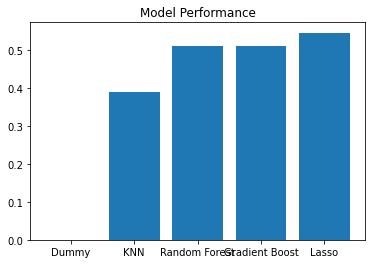

In [271]:
Dict = {"Dummy": 0, "KNN": 0.390, "Random Forest": 0.511, "Gradient Boost": 0.510,"Lasso": 0.546}
plt.bar(range(len(Dict)), list(Dict.values()), align='center')
plt.xticks(range(len(Dict)), list(Dict.keys()))
plt.title("Model Performance")
plt.savefig('ModelPerformance.png', dpi=300)

Lets also take a look at the residuals and visualize them for this model to check assumptions

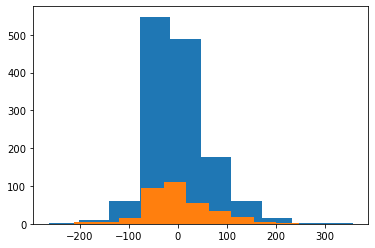

In [269]:
train_pred = lasso.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)
train_residuals = y_train - train_pred
test_residuals = y_test - test_pred
plt.hist(train_residuals)
plt.hist(test_residuals)
plt.savefig('Residuals1.png', dpi=300)

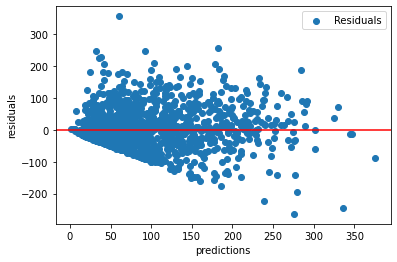

In [270]:
plt.scatter(train_pred, train_residuals, label='Residuals')
plt.axhline(y=0,color = 'red')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.savefig('Residuals2.png', dpi=300)

## Exploring Model Predictions

First, Checking to make sure our prediccted PPR points match our data frame:

In [173]:
X_test_scaled.shape

(343, 61)

In [174]:
Final_predictions = lasso.predict(X_test_scaled)
Final_predictions.shape

(343,)

In [175]:
X_test.shape

(343, 61)

In [176]:
X_test.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C
311,11,4,1,1,16,0,0,0,0,0.0,...,1,0,0,0,0,0,0,1,0,0
368,16,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
439,16,4,0,0,0,0,0,6,24,4.0,...,0,0,0,0,0,1,0,0,1,0
24,16,14,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
364,15,4,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [177]:
X_test['PredictedPPR']=Final_predictions.tolist()
X_test.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
311,11,4,1,1,16,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,48.441183
368,16,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,28.302932
439,16,4,0,0,0,0,0,6,24,4.0,...,0,0,0,0,1,0,0,1,0,28.106573
24,16,14,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,209.892300
364,15,4,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,1,32.030017


In [178]:
Final_df = X_test.sort_values(by=['PredictedPPR'], ascending=False)

In [179]:
Final_df.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
20,16,16,422,608,4924,35,7,33,125,3.79,...,0,0,0,1,0,0,0,0,1,287.940780
5,16,16,0,0,0,0,0,22,151,6.86,...,0,0,0,0,0,0,1,0,0,281.311404
44,16,16,364,561,4688,32,12,43,108,2.51,...,0,0,0,1,0,0,0,0,0,276.700621
9,15,15,0,0,0,0,0,0,0,0.00,...,0,0,0,0,0,0,1,1,0,267.120633
13,16,16,341,516,4110,31,5,75,342,4.56,...,0,0,0,1,0,0,0,0,1,265.589416


From this we can see that the highest predicted NFL player's PPR prediction for the next year, from our test set, if we reference back, is 2018 Falcon's QB Matt Ryan with 288.3. How Accurate is this? he followed up the following year with a score of 267.3, so not too far off!

Next I am going to apply our model to the 2022 NFL Season, to get predictions for the upcoming year.

Our first step is to apply all of the feature engineering and scaling to our data from the 2021 NFL season, since we had previosly only used the 2021 data to create the 2020 targetPPR field:

In [182]:
pd21=pd21.dropna(subset = ['PPR'])
pd21= pd21[pd21['PPR'] > 0] 
pd21=pd21.drop(columns=['-9999'])
pd21_dummies = pd.get_dummies(pd21[categoricals], prefix=categoricals)
pd21.drop(['Tm', 'FantPos'], axis=1, inplace=True)
pd21_dummies.drop(['Tm_3TM','Tm_2TM'], axis=1, inplace=True)
pd21_final = pd.concat([pd21, pd21_dummies], axis="columns")
pd21_final["Age Bins"] = pd.cut(pd21_final['Age'], 
    [0, 24, 29, 100], 
    labels=['A', 'B', 'C'],
    right=True               
)
pd21_age_dummies = pd.get_dummies(pd21_final["Age Bins"], prefix='age')
pd21_final = pd.concat([pd21_final,pd21_age_dummies], axis="columns")
pd21_final.drop(['age_A'], axis=1, inplace=True)
pd21_final.drop(['Age Bins'], axis=1, inplace=True)
pd21_final.drop(['Age'], axis=1, inplace=True)
pd21_final_scaled=ss.transform(pd21_final)

In [183]:
NFL2022_preds=lasso.predict(pd21_final_scaled)

In [184]:
pd21_final["PredictedPPR"]=NFL2022_preds.tolist()


In [191]:
pd21_final = pd21_final.sort_values(by=['PredictedPPR'], ascending=False)
pd21_final.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TEN,Tm_WAS,FantPos_0,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
1,17,17,0.0,1.0,0.0,0.0,0.0,4.0,18.0,4.50,...,0,0,0,0,0,0,1,1,0,341.415327
5,17,17,443.0,672.0,5014.0,38.0,15.0,63.0,302.0,4.79,...,0,0,0,1,0,0,0,0,0,328.315546
3,17,17,409.0,646.0,4407.0,36.0,15.0,122.0,763.0,6.25,...,0,0,0,1,0,0,0,1,0,319.501682
6,17,17,485.0,719.0,5316.0,43.0,12.0,28.0,81.0,2.89,...,0,0,0,1,0,0,0,0,1,311.561734
12,17,17,436.0,658.0,4839.0,37.0,13.0,66.0,381.0,5.77,...,0,0,0,1,0,0,0,1,0,310.996689


In [186]:
pd21_ref.head(5)

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999
0,IND,RB,22,17,17,0.0,0.0,0.0,0.0,0.0,...,360.0,9.00,2.0,4.0,2.0,20,0.0,0.0,373.1,TaylJo02
1,LAR,WR,28,17,17,0.0,1.0,0.0,0.0,0.0,...,1947.0,13.43,16.0,0.0,0.0,16,1.0,0.0,439.5,KuppCo00
2,SFO,WR,25,16,15,1.0,2.0,24.0,1.0,0.0,...,1405.0,18.25,6.0,4.0,2.0,14,0.0,0.0,339.0,SamuDe00
3,BUF,QB,25,17,17,409.0,646.0,4407.0,36.0,15.0,...,0.0,0.00,0.0,8.0,3.0,6,2.0,1.0,402.6,AlleJo02
4,LAC,RB,26,16,16,0.0,0.0,0.0,0.0,0.0,...,647.0,9.24,8.0,4.0,3.0,20,2.0,0.0,343.8,EkelAu00


In [189]:
print(pd21_ref.loc[[1,5,3,12,6],'-9999'])

1     KuppCo00
5     HerbJu00
3     AlleJo02
12    MahoPa00
6     BradTo00
Name: -9999, dtype: object


Interestingly, Our model is predicting for the 2022 season that Cooper Kupp will be the #1 overall PPR scorer, and Jonathon Taylor who is #1 on many fantasy ranking sites drops to #13. 

Other then Kupp, the top of our predictionss is dominated by QBs, Lets dig in deepter and seperate by position

In [204]:
RBpreds = pd21_final[pd21_final['FantPos_RB'] == 1]
RBpreds.head(20)

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TEN,Tm_WAS,FantPos_0,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
0,17,17,0.0,0.0,0.0,0.0,0.0,332.0,1811.0,5.45,...,0,0,0,0,1,0,0,0,0,257.047455
4,16,16,0.0,0.0,0.0,0.0,0.0,206.0,911.0,4.42,...,0,0,0,0,1,0,0,1,0,246.922740
13,17,17,0.0,0.0,0.0,0.0,0.0,307.0,1200.0,3.91,...,0,0,0,0,1,0,0,0,0,217.572903
10,16,16,0.0,0.0,0.0,0.0,0.0,292.0,1205.0,4.13,...,0,0,0,0,1,0,0,1,0,198.979363
33,14,13,0.0,1.0,0.0,0.0,0.0,180.0,812.0,4.51,...,0,0,0,0,1,0,0,1,0,185.624642
41,15,15,0.0,0.0,0.0,0.0,0.0,171.0,799.0,4.67,...,0,0,0,0,1,0,0,1,0,185.436641
15,15,6,0.0,0.0,0.0,0.0,0.0,202.0,752.0,3.72,...,0,0,0,0,1,0,0,1,0,182.665838
31,13,10,0.0,0.0,0.0,0.0,0.0,240.0,898.0,3.74,...,0,0,0,0,1,0,0,1,0,173.279927
46,15,14,0.0,0.0,0.0,0.0,0.0,217.0,872.0,4.02,...,0,0,0,0,1,0,0,0,0,171.011441
21,17,17,1.0,1.0,4.0,0.0,0.0,237.0,1002.0,4.23,...,0,0,0,0,1,0,0,1,0,170.053118


In [207]:
print(pd21_ref.loc[[0,4,13,10,33,41,15,31,46,21,32,35,72,45,69,71],'-9999'])

0     TaylJo02
4     EkelAu00
13    HarrNa00
10    MixoJo00
33    FourLe00
41    JoneAa00
15    ConnJa00
31    KamaAl00
46    JacoJo01
21    ElliEz00
32    GibsAn00
35    PattCo00
72    SwifDA00
45    CookDa01
69    DillAJ00
71    WillDa10
Name: -9999, dtype: object


The top running backs appear to be Jonathon Taylor, Austin Ekeler, Najee Hariss, Joe Mixon, and Leonard Fournette

In [237]:
QBpreds = pd21_final[pd21_final['FantPos_QB'] == 1]
QBpreds.head(20)

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TEN,Tm_WAS,FantPos_0,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
5,17,17,443.0,672.0,5014.0,38.0,15.0,63.0,302.0,4.79,...,0,0,0,1,0,0,0,0,0,327.854618
3,17,17,409.0,646.0,4407.0,36.0,15.0,122.0,763.0,6.25,...,0,0,0,1,0,0,0,1,0,319.958666
12,17,17,436.0,658.0,4839.0,37.0,13.0,66.0,381.0,5.77,...,0,0,0,1,0,0,0,1,0,309.966936
6,17,17,485.0,719.0,5316.0,43.0,12.0,28.0,81.0,2.89,...,0,0,0,1,0,0,0,0,1,309.650947
17,16,16,366.0,531.0,4115.0,37.0,4.0,33.0,101.0,3.06,...,0,0,0,1,0,0,0,0,1,295.211764
19,17,17,404.0,601.0,4886.0,41.0,17.0,32.0,43.0,1.34,...,0,0,0,1,0,0,0,0,1,286.302691
22,16,16,410.0,596.0,4449.0,37.0,10.0,48.0,146.0,3.04,...,0,0,0,1,0,0,0,1,0,272.606864
40,16,16,372.0,561.0,4221.0,33.0,7.0,29.0,115.0,3.97,...,0,0,0,1,0,0,0,0,1,267.358639
28,16,16,366.0,520.0,4611.0,34.0,14.0,40.0,118.0,2.95,...,0,0,0,1,0,0,0,1,0,264.097176
39,14,14,333.0,481.0,3787.0,24.0,10.0,88.0,423.0,4.81,...,0,0,0,1,0,0,0,0,0,254.081956


In [196]:
print(pd21_ref.loc[[5,3,12,6,17],'-9999'])

5     HerbJu00
3     AlleJo02
12    MahoPa00
6     BradTo00
17    RodgAa00
Name: -9999, dtype: object


The top 5 QBs appear are Justin Herbert, Josh Allen, Patrick Mahomes, Tom Brady, and Aaron Rodgers

In [201]:
WRpreds = pd21_final[pd21_final['FantPos_WR'] == 1]
WRpreds.head(15)

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TEN,Tm_WAS,FantPos_0,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
1,17,17,0.0,1.0,0.0,0.0,0.0,4.0,18.0,4.50,...,0,0,0,0,0,0,1,1,0,341.415327
11,16,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,1,1,0,281.861565
9,17,17,2.0,4.0,35.0,0.0,0.0,6.0,14.0,2.33,...,0,0,0,0,0,0,1,0,0,281.812911
2,16,15,1.0,2.0,24.0,1.0,0.0,59.0,365.0,6.19,...,0,0,0,0,0,0,1,1,0,262.562707
18,17,16,0.0,0.0,0.0,0.0,0.0,9.0,96.0,10.67,...,0,0,0,0,0,0,1,1,0,245.241724
8,17,17,0.0,0.0,0.0,0.0,0.0,7.0,21.0,3.00,...,0,0,0,0,0,0,1,0,0,244.923154
20,17,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,1,1,0,216.385373
29,16,14,0.0,0.0,0.0,0.0,0.0,5.0,53.0,10.60,...,0,0,0,0,0,0,1,1,0,215.186122
42,16,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,1,1,0,208.180189
16,16,16,0.0,0.0,0.0,0.0,0.0,1.0,10.0,10.00,...,0,0,0,0,0,0,1,1,0,206.448135


In [202]:
print(pd21_ref.loc[[1,11,9,2,18,8,20,29,42,16,38,24,54,37,25],'-9999'])

1     KuppCo00
11    AdamDa01
9     JeffJu00
2     SamuDe00
18    HillTy00
8     ChasJa00
20    DiggSt00
29    JohnDi01
42    AlleKe00
16    EvanMi00
38    LambCe00
24    WillMi07
54    WaddJa00
37    RenfHu00
25    MetcDK00
Name: -9999, dtype: object


The Top 5 WRs are Cooper Kupp, Devante Adams, Justin Jefferson, Deebo Samuel, and Tyreek Hill

In [241]:
TEpreds = pd21_final[pd21_final['FantPos_TE'] == 1]
TEpreds.head(20)

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_TEN,Tm_WAS,FantPos_0,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C,PredictedPPR
7,17,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,...,0,0,0,0,0,1,0,1,0,222.079130
14,16,16,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.50,...,0,0,0,0,0,1,0,0,1,209.562258
36,14,14,0.0,0.0,0.0,0.0,0.0,3.0,20.0,6.67,...,0,0,0,0,0,1,0,1,0,162.167882
34,17,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,1,0,158.113929
58,17,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,148.722294
61,17,14,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.00,...,0,0,0,0,0,1,0,0,1,137.476376
47,12,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,1,135.737632
138,16,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,129.790759
56,15,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,1,0,129.709438
73,17,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,1,0,127.764023


In [198]:
print(pd21_ref.loc[[7,14,36,34,58,61],'-9999'])

7     AndrMa00
14    KelcTr00
36    KittGe00
34    SchuDa00
58    PittKy00
61    ErtzZa00
Name: -9999, dtype: object


The Top 5 TEs are Mark Andrews, Travis Kelce, Daltan Schultz, George Kittle, and Kyle Pitts

Since our model is predicting overall points and can be used as a drafting tool, it is interesting to compare its player rankings to current draft "ADP" values, the average draft positions across differrent fantasy sports websites. Although many sites have slighty different rankings, I will compare our data to a popular site that aggregates fantasy apr rankings: fantasypros.com. 

An obvious initial change in their rankings vs ours is our models rank of Cooper Kupp. Our model preditcs that he will outperform not only other wide recieivers, but also top runnings backs which have traditionally held a tight grip on the top draft position. In a typical leauge that runs either 2WR and 2RB with a flex, or 2RB and 3WR, which are both common settups, Kupp is the clear first pick based on our model. However the overall ADP is 4th and the experts ranking for Kupp typically is always after McCaffrey, Taylor, and Ekeler. 

Other early differences between the model and online rankings that are notable: Our model does not think you should draft McCaffrey early. Since he has 2 years of recent injury hampered seasons this is unsuprising. Our model highly ranks running backs such as Najee Harris(RB3 in our model vs RB6 in ADP rankings) and Darrel Williams(RB17 in our model compared to RB63 in ADP) 

Looking back at Wide Recievers which our model rates differently than the ADP like Kupp, we see that Diontae Johnson is rated much higher at WR8 then his ADP of WR15. This is an interesting difference, as if you dig deeper into fantasy news, the early performance of young QB Kenny Pickett is extremely promising as well. 

Finally, if we compare our top TE picks from our model to the Fantasy Pros ADP rankings, we can see that although there are no major outliers in the top 10 picks, Zach Ertz is rated in 6th in our model and grouped very close in predicted PPR to tight ends in that 4th-6th range, which would likely be worth drafting a round sooner then his TE10 ADP spot. 

## Next Steps

Although the model does give a lot of input regarding draft picks, it also falls short in noticeable ways. One of the most obvious is its inability to predict or adjust for injury. But there are also a lot of "soft metrics" that can influence player performance. Contract negotiations and hold outs, coaching staff changes, players around them, off-field behavior etc. 

There are also several weekly factors that weren’t included in seasonal data such as which defense they are playing, weather that day, home or away games, field type, etc. 

Moving forward, I would like to transition this model into something similar, but with a target of a weekly instead of a seasonal PPR performance. A weekly model can still create seasonal predictions, or at least sums of weekly predictions, but it would allow me to introduce new features to improve the accuracy both in season long predictions and allow it to start creating weekly "start vs sit" decisions. Creating weekly value decisions has shown to be a relatively reliable of selecting winning football teams(https://ieeexplore.ieee.org/document/8367900). 


In addition, adding NLP and scraping twitter for recent tweets on players could be a way to crowdsource wisdom regarding some of the "soft metrics" that are hard to introduce to a data frame. For example, a player with concerning off-field behavior, or a poor training camp performance will quickly draw negative fan attention, and the relative amount of negative vs positive fan tweets and frequency could be introduced into a model. In fact, some work has been done already to create a specific sentiment dataset with a lexicon trained for football fans, and their unique venaculer(https://www.researchgate.net/publication/329436134_Sentiment_Identification_in_Football-Specific_Tweets). In addition, it has been shown that twitter trends are usefyll in predicting not just fan sentiment, but match outcomes in the English Premier League(https://arxiv.org/ftp/arxiv/papers/1411/1411.1243.pdf), and in the NFL(https://arxiv.org/abs/1310.6998), and if it can predict game outcomes in ways that statistics fall short, applying them to player outcomes has promise as well. 

## Conclusion

Our model in its current form creates a useful tool for fantasy football players. It provides a way to predict PPR fantasy performance in a way that accounts for 52% of the variation. However, it must be taken with a grain of salt. Since we don’t model every metric, and don’t have the most recent team news in the model. The best way to use the model is to highlight differences between the current fantasy rankings, and the models rankings of players. If the ranking difference is likely because of recent news that our model hasn’t factored in, it is better to trust the consensus. However, in cases where there is not an additional factor to consider, the model can highlight players that might be undervalued or overvalued by the current fantasy rankings.